In [1]:
import numpy as np
import serial
import time
import h5py
from datetime import datetime
from datetime import date
import cv2
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
def tactile_reading(path):
    """
    Reads tactile sensor data from an HDF5 file.

    This function opens an HDF5 file at the specified path and extracts 
    tactile sensor data, including frame count, timestamps, pressure readings, 
    and packet IDs. The data is then returned as numpy arrays.

    Parameters:
    path (str): The path to the HDF5 file containing the tactile sensor data.

    Returns:
    tuple:
        pressure (np.ndarray): An array of pressure readings with shape (frame_count,rows,cols). (32x32 by default)
        frame_count (int): The number of frames (or data points) in the file.
        ts (np.ndarray): An array of timestamps with shape (frame_count,).
        packetIDs (np.ndarray): An array of packet IDs with shape (frame_count,9). Represents all packetIDs received during a frame. 
    """
    f = h5py.File(path, 'r')
    fc = f['frame_count'][0]
    ts = np.array(f['ts'][:fc])
    pressure = np.array(f['pressure'][:fc]).astype(np.float32)
    packetIDs = np.array(f['packetNumber'][:fc])
    preds = np.array(f['predCount'][:fc])
    return pressure, fc, ts, packetIDs,preds

def find_closest_index(array, value):
    index = (np.abs(array - value)).argmin()
    return index, array[index]

def getHandAvgs(file, startTs,endTs):
    pressureL, fcL, ts = tactile_reading(file)[0:3]

    startLIdx, StartLts = find_closest_index(ts, startTs)

    endLIdx, endLts = find_closest_index(ts, endTs)

    print(f"{file}: Start Time: {StartLts}, EndTime: {endLts}, NumSteps: {endLIdx-startLIdx}")

    IndexRegion = (slice(0,5), slice(4,7))
    PinkieRegion = (slice(0,4), slice(13,15))
    ThumbRegion = (slice(12,15), slice(1,4))
    MiddleRegion = (slice(0,5),slice(7,10))
    RingRegion = (slice(0,5),slice(10,13))

    regions = [ThumbRegion,IndexRegion,MiddleRegion,RingRegion,PinkieRegion]

    avgs = []

    for region in regions:
        avg = np.mean(pressureL[startLIdx:endLIdx,region[0],region[1]], axis=(1,2))
        avgs.append(avg)

    return np.array(avgs)
    

In [30]:
leftCalpath = 'sensorLeftCalibrate2.hdf5'
rightCalpath = 'sensorRightCalibrate2.hdf5'
leftUncal = 'sensorLeft.hdf5'
rightUncal= 'sensorRight.hdf5'
startTs = 1723900256.995211
endTs = 1723900286.994272
uncalStart = 1723896850.981655
uncalEnd = 1723896882.980232

rightCalAvgs = getHandAvgs(rightCalpath, startTs, endTs)
rightUncalAvgs = getHandAvgs(rightUncal, uncalStart, uncalEnd)
leftCalAvgs = getHandAvgs(leftCalpath, startTs, endTs)
leftUncalAvgs = getHandAvgs(leftUncal, uncalStart, uncalEnd)



sensorRightCalibrate2.hdf5: Start Time: 1723900257.000197, EndTime: 1723900287.004721, NumSteps: 1257
sensorRight.hdf5: Start Time: 1723896850.981655, EndTime: 1723896882.980232, NumSteps: 1322
sensorLeftCalibrate2.hdf5: Start Time: 1723900256.995211, EndTime: 1723900286.994272, NumSteps: 1261
sensorLeft.hdf5: Start Time: 1723896850.962538, EndTime: 1723896882.983224, NumSteps: 1330


In [31]:
rightCalTs = np.linspace(0, 1723900287.004721-1723900257.000197, 1257)
rightUncalTs = np.linspace(0, 1723896882.980232-1723896850.981655, 1322)
leftCalTs = np.linspace(0, 1723900286.994272-1723900256.995211, 1261)
leftUncalTs = np.linspace(0, 1723896882.983224-1723896850.962538, 1330)

In [35]:
import csv

# Function to save data to a CSV file
def save_to_csv(filename, timestamps, data):
    with open(filename, mode="w", newline="") as file:
        writer = csv.writer(file)
        writer.writerow(["Timestamp", "Thumb", "Index", "Middle", "Ring", "Pinkie"])
        for j in range(len(data[0])):
            writer.writerow([timestamps[j], data[0][j], data[1][j], data[2][j], data[3][j], data[4][j]])
    print(f"Data saved to {filename}")

save_to_csv("rightUncalibrated.csv", rightUncalTs, rightUncalAvgs)
save_to_csv("leftUncalibrated.csv", leftUncalTs, leftUncalAvgs)
save_to_csv("rightCalibrated.csv", rightCalTs, rightCalAvgs)
save_to_csv("leftCalibrated.csv", leftCalTs, leftCalAvgs)

Data saved to rightUncalibrated.csv
Data saved to leftUncalibrated.csv
Data saved to rightCalibrated.csv
Data saved to leftCalibrated.csv


walkJunyi.hdf5: Start Time: 1723904099.965362, EndTime: 1723904109.029427, NumSteps: 226
walkDevin.hdf5: Start Time: 1723903269.969078, EndTime: 1723903278.968234, NumSteps: 226


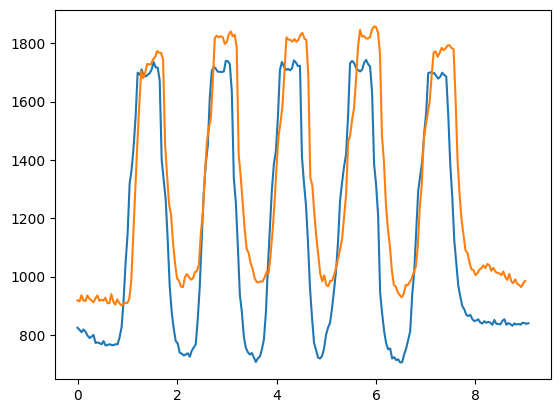

In [69]:
junyiShoe = 'walkJunyi.hdf5'
devinShoe = 'walkDevin.hdf5'
def getShoeAvgs(file, startTs, endTs):
    pressureL, fcL, ts = tactile_reading(file)[0:3]

    startLIdx, StartLts = find_closest_index(ts, startTs)

    endLIdx, endLts = find_closest_index(ts, endTs)

    print(f"{file}: Start Time: {StartLts}, EndTime: {endLts}, NumSteps: {endLIdx-startLIdx}")

    return np.mean(pressureL[startLIdx:endLIdx, :, :], axis=(1,2))

junyiAvgs = getShoeAvgs(junyiShoe, 1723904249.485765-149.5, 1723904249.485765-140.5)
devinAvgs = getShoeAvgs(devinShoe, 1723903675.221177-405.25, 1723903675.221177-396.25)

junyiTs = np.linspace(0, 1723904109.029427-1723904099.965362, 226)
devinTs = np.linspace(0, 1723903278.968234-1723903269.969078, 226)

plt.figure()
plt.plot(junyiTs[:226],junyiAvgs[:226])
plt.plot(devinTs, devinAvgs)


In [70]:
# Function to save data to a CSV file
def save_shoe(filename, timestamps, data, header):
    with open(filename, mode="w", newline="") as file:
        writer = csv.writer(file)
        writer.writerow(["Timestamp", header])
        for j in range(len(data)):
            writer.writerow([timestamps[j], data[j]])
    print(f"Data saved to {filename}")

save_shoe("junyiWalk.csv",junyiTs,junyiAvgs,"avgAdc")
save_shoe("devinWalk.csv",devinTs,devinAvgs,"avgAdc")

Data saved to junyiWalk.csv
Data saved to devinWalk.csv


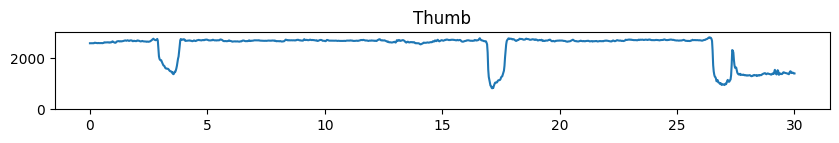

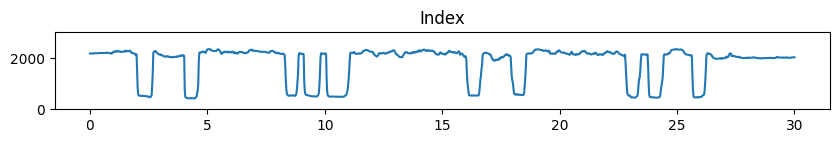

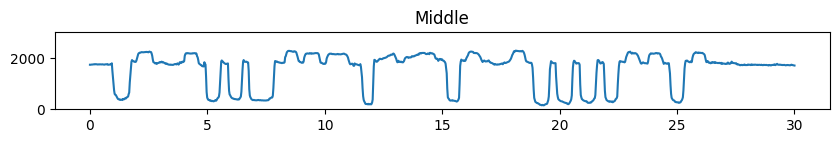

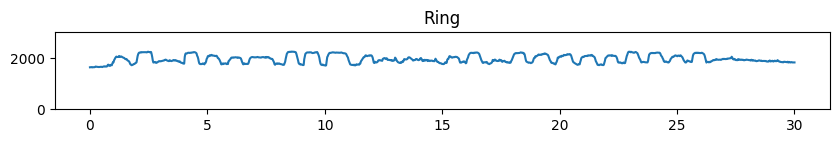

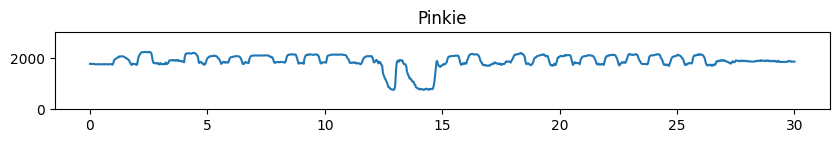

In [76]:
titles=['Thumb','Index','Middle','Ring','Pinkie']
for i in range(5):
    plt.figure(figsize=(10,1))
    plt.title(titles[i])
    plt.plot(rightCalTs,rightCalAvgs[i])
    # plt.plot(rightCalTs[:1257],rightUncalAvgs[i][:1257])
    plt.ylim((0,3000))

In [ ]:
pillowPresh, fc,ts,_,_ = tactile_reading("./recordings/pillowTest.hdf5")
volumeUpRegion = (slice(0,16), slice(16,32))
volumeDownRegion = (slice(16,32), slice(16,32))
playRegion = (slice(0,16),slice(0,16))
pauseRegion = (slice(16,32),slice(0,16))

avgVolumeUp = [np.mean(pillowPresh[i,volumeUpRegion(0),volumeUpRegion(1)]) for i in range(pillowPresh.shape[0])]
avgVolumeDown= [np.mean(pillowPresh[i,volumeDownRegion(0),volumeDownRegion(1)]) for i in range(pillowPresh.shape[0])]
avgPlay = [np.mean(pillowPresh[i,playRegion(0),playRegion(1)]) for i in range(pillowPresh.shape[0])]
avgPause = [np.mean(pillowPresh[i,pauseRegion(0),pauseRegion(1)]) for i in range(pillowPresh.shape[0])]

plt.plot(avgVolumeUp)
plt.plot(avgVolumeDown)
plt.plot(avgPause)
plt.plot(avgPlay)